In [3]:
import os
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('AmesHousing.csv')
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


# EDA

In [6]:
# Do exploratory data analysis
data = df[[
    "Lot Area","Street","House Style","Bldg Type","Overall Cond","Year Remod/Add",
    "Roof Style","Foundation","Heating","Central Air","1st Flr SF","2nd Flr SF",
    "Garage Type","Garage Area","Paved Drive","Pool Area","SalePrice"

]]
data.shape

(2930, 17)

In [15]:
data_num = data.select_dtypes(include = ['int','float'])
data_num.describe()

,Lot Area,Overall Cond,Year Remod/Add,1st Flr SF,2nd Flr SF,Garage Area,Pool Area,SalePrice
count,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2929.000000,2930.000000,2930.000000
mean,10147.921843,5.563140,1984.266553,1159.557679,335.455973,472.819734,2.243345,180796.060068
std,7880.017759,1.111537,20.860286,391.890885,428.395715,215.046549,35.597181,79886.692357
min,1300.000000,1.000000,1950.000000,334.000000,0.000000,0.000000,0.000000,12789.000000
25%,7440.250000,5.000000,1965.000000,876.250000,0.000000,320.000000,0.000000,129500.000000
50%,9436.500000,5.000000,1993.000000,1084.000000,0.000000,480.000000,0.000000,160000.000000
75%,11555.250000,6.000000,2004.000000,1384.000000,703.750000,576.000000,0.000000,213500.000000
max,215245.000000,9.000000,2010.000000,5095.000000,2065.000000,1488.000000,800.000000,755000.000000


In [16]:
data_obj = data.select_dtypes(include = ['object'])
data_obj.describe()

,Street,House Style,Bldg Type,Roof Style,Foundation,Heating,Central Air,Garage Type,Paved Drive
count,2930,2930,2930,2930,2930,2930,2930,2773,2930
unique,2,8,5,6,6,6,2,6,3
top,Pave,1Story,1Fam,Gable,PConc,GasA,Y,Attchd,Y
freq,2918,1481,2425,2321,1310,2885,2734,1731,2652


In [39]:
data['Garage Type']= data['Garage Type'].fillna('noGarage');print(data.shape)
data = data.dropna(subset ='Garage Area');print(data.shape)

data_num = data.select_dtypes(include = ['int','float'])
data_obj = data.select_dtypes(include = ['object'])

data.isnull().sum()

(2929, 17)
(2929, 17)


Lot Area          0
Street            0
House Style       0
Bldg Type         0
Overall Cond      0
Year Remod/Add    0
Roof Style        0
Foundation        0
Heating           0
Central Air       0
1st Flr SF        0
2nd Flr SF        0
Garage Type       0
Garage Area       0
Paved Drive       0
Pool Area         0
SalePrice         0
dtype: int64

# visualizations

In [26]:
# add more visualizations
data.head()

,Lot Area,Street,House Style,Bldg Type,Overall Cond,Year Remod/Add,Roof Style,Foundation,Heating,Central Air,1st Flr SF,2nd Flr SF,Garage Type,Garage Area,Paved Drive,Pool Area,SalePrice
0,31770,Pave,1Story,1Fam,5,1960,Hip,CBlock,GasA,Y,1656,0,Attchd,528.0,P,0,215000
1,11622,Pave,1Story,1Fam,6,1961,Gable,CBlock,GasA,Y,896,0,Attchd,730.0,Y,0,105000
2,14267,Pave,1Story,1Fam,6,1958,Hip,CBlock,GasA,Y,1329,0,Attchd,312.0,Y,0,172000
3,11160,Pave,1Story,1Fam,5,1968,Hip,CBlock,GasA,Y,2110,0,Attchd,522.0,Y,0,244000
4,13830,Pave,2Story,1Fam,5,1998,Gable,PConc,GasA,Y,928,701,Attchd,482.0,Y,0,189900


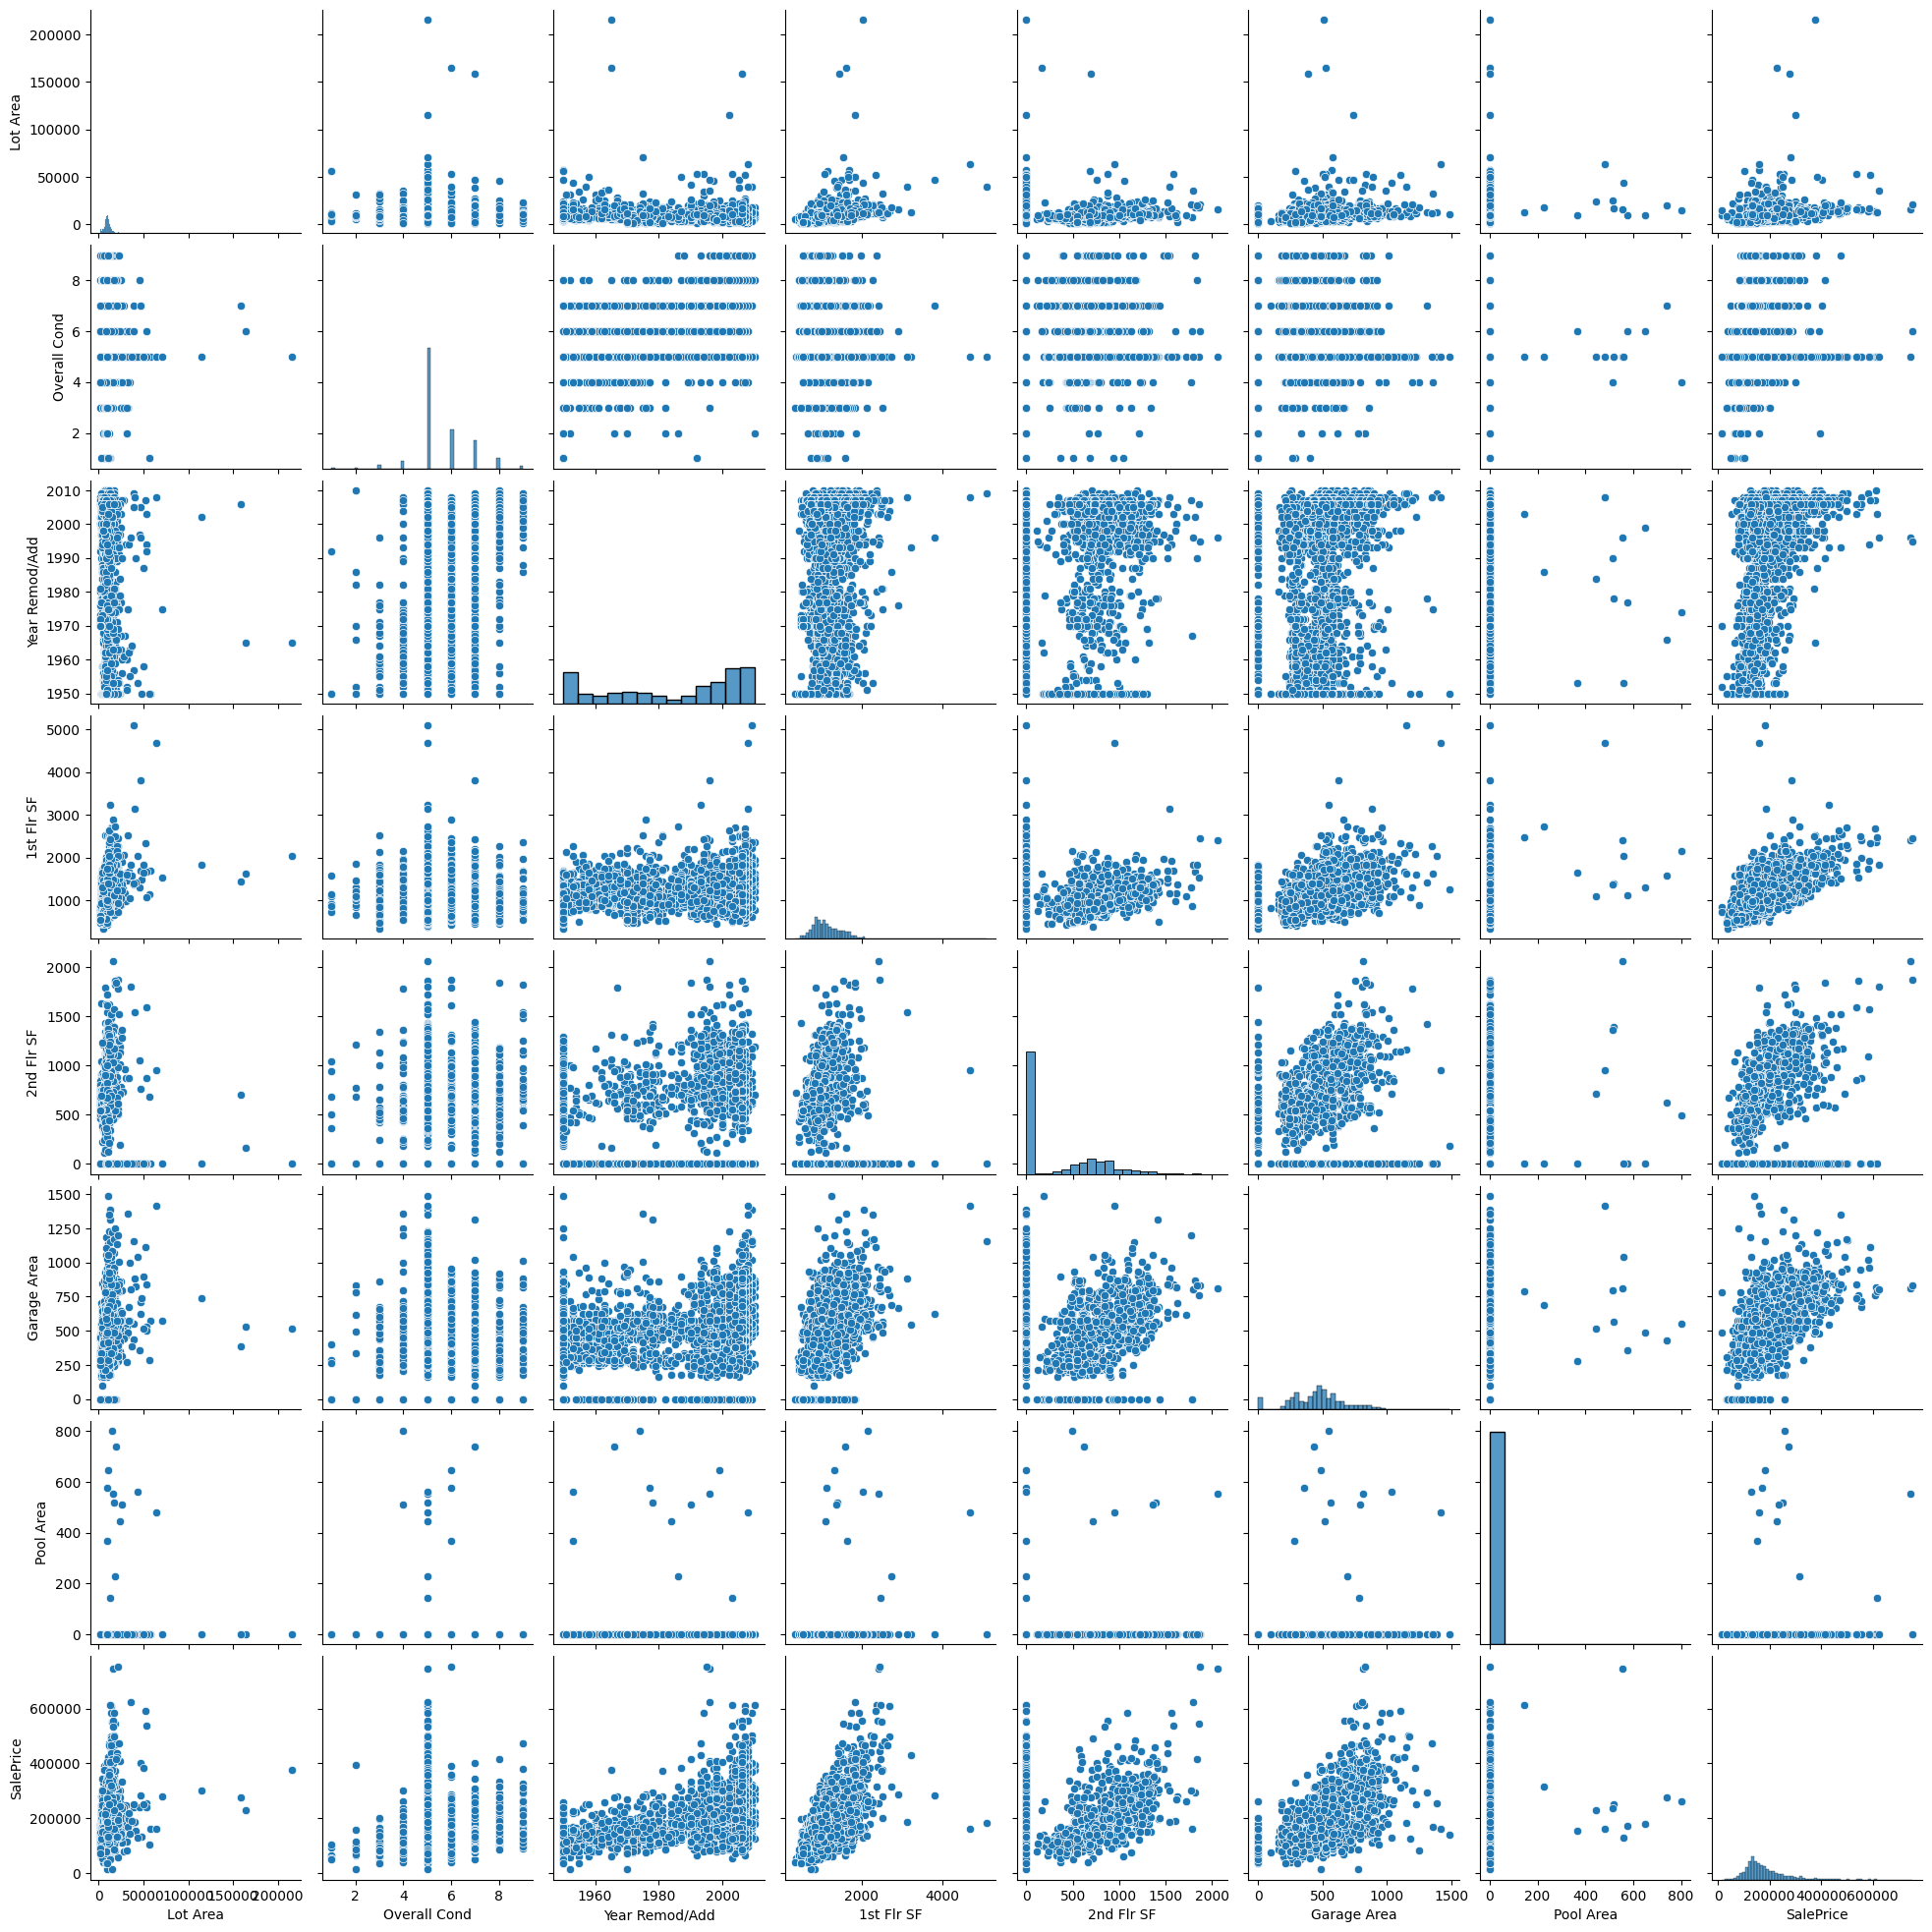

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly_express as px
from plotnine import *

sns.pairplot(data)

In [40]:
from sklearn.preprocessing import LabelEncoder

new = pd.DataFrame()
encode = LabelEncoder()
for i in data_obj.columns:
    new[i] = encode.fit_transform(data_obj[i])

In [53]:
new['salePrice'] = data['SalePrice']
#sns.pairplot(new)
data.head()

,Lot Area,Street,House Style,Bldg Type,Overall Cond,Year Remod/Add,Roof Style,Foundation,Heating,Central Air,1st Flr SF,2nd Flr SF,Garage Type,Garage Area,Paved Drive,Pool Area,SalePrice
0,31770,Pave,1Story,1Fam,5,1960,Hip,CBlock,GasA,Y,1656,0,Attchd,528.0,P,0,215000
1,11622,Pave,1Story,1Fam,6,1961,Gable,CBlock,GasA,Y,896,0,Attchd,730.0,Y,0,105000
2,14267,Pave,1Story,1Fam,6,1958,Hip,CBlock,GasA,Y,1329,0,Attchd,312.0,Y,0,172000
3,11160,Pave,1Story,1Fam,5,1968,Hip,CBlock,GasA,Y,2110,0,Attchd,522.0,Y,0,244000
4,13830,Pave,2Story,1Fam,5,1998,Gable,PConc,GasA,Y,928,701,Attchd,482.0,Y,0,189900


<Axes: xlabel='Street'>

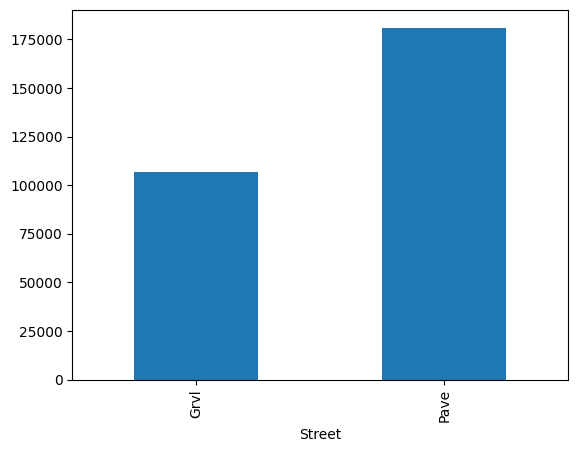

In [52]:
data.groupby(['Street'])['SalePrice'].agg('mean').plot(kind = 'bar')

In [60]:
y = data[['Pool Area','SalePrice',"House Style"]].melt(id_vars = 'House Style')
y.head()

,House Style,variable,value
0,1Story,Pool Area,0
1,1Story,Pool Area,0
2,1Story,Pool Area,0
3,1Story,Pool Area,0
4,2Story,Pool Area,0


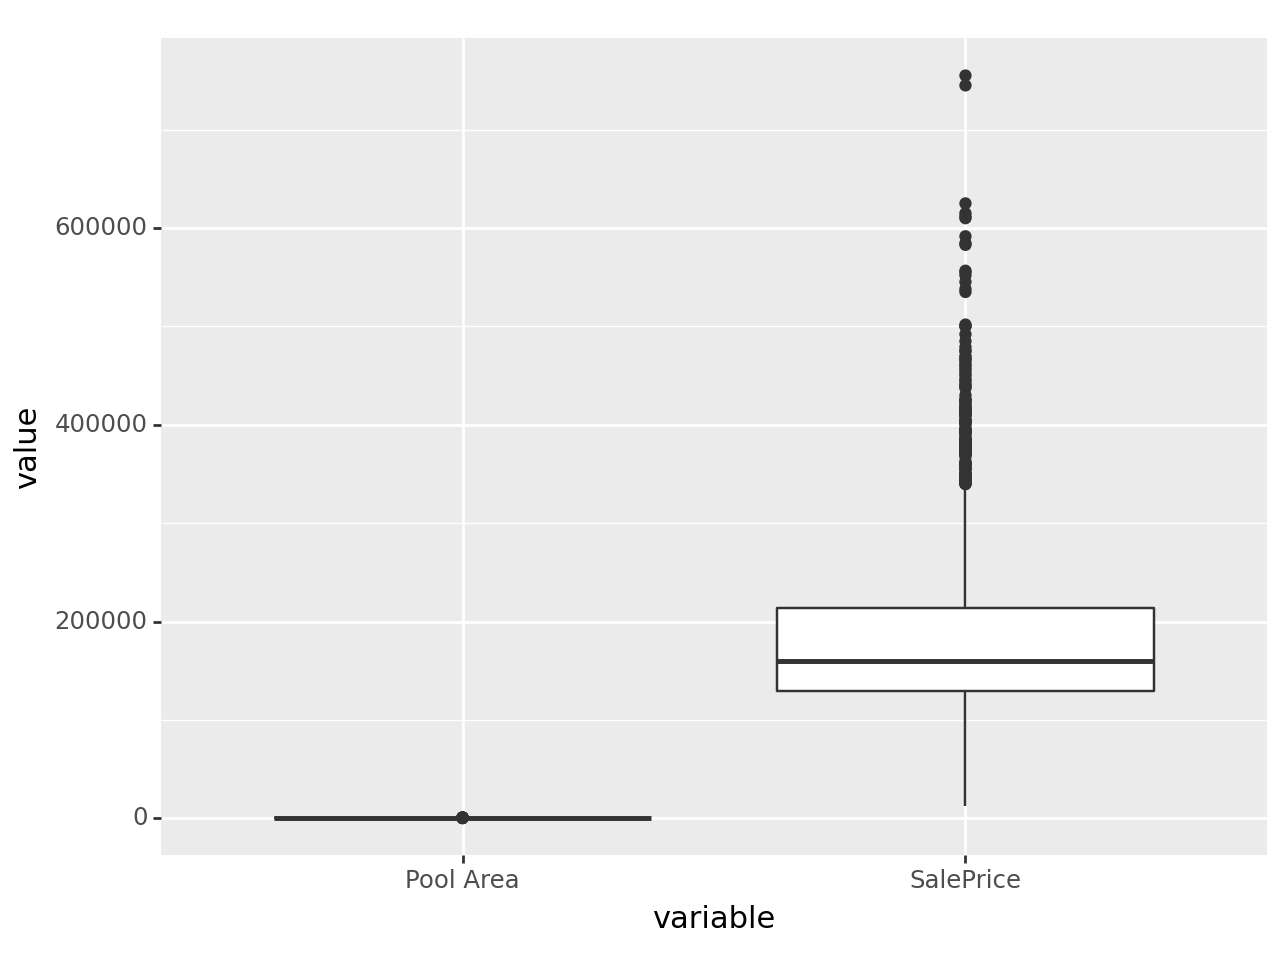

<Figure Size: (640 x 480)>

In [62]:
(ggplot(y,aes(x = 'variable',y = 'value'))+geom_boxplot())